# Graph comparing different simulators

## 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Graph

1. Time execution vs Data set sizes between simulators

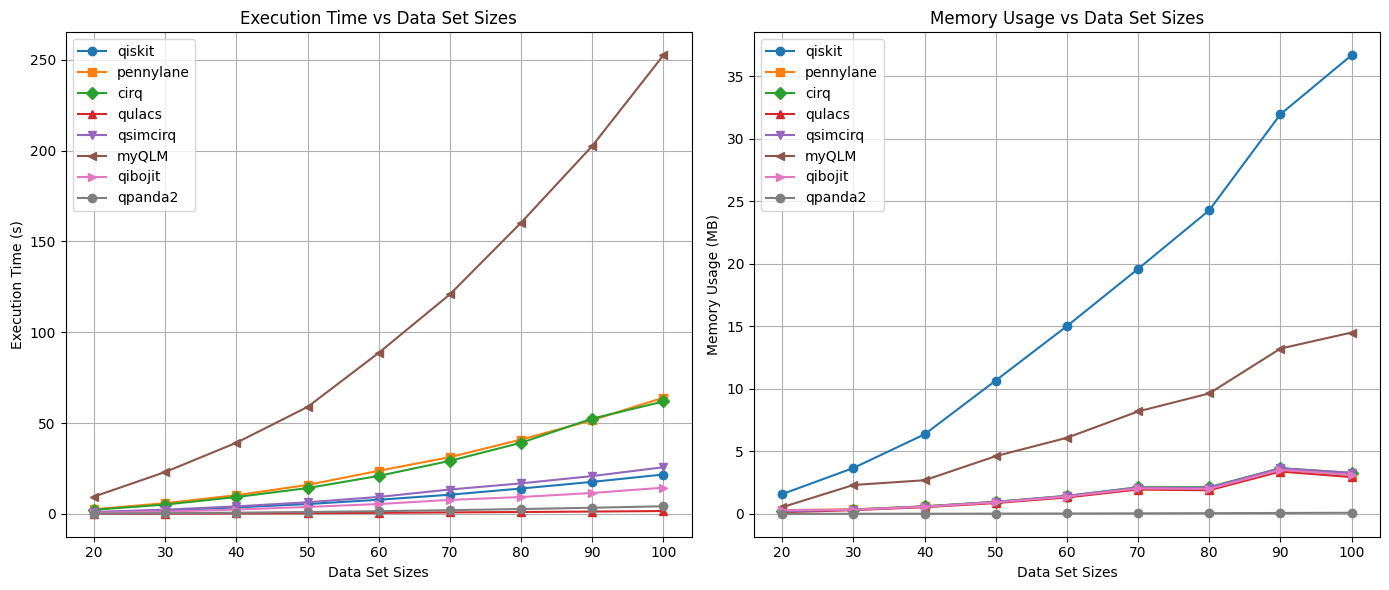

In [2]:
df_time = pd.read_csv("Record Data/time_executions.csv")
df_mem = pd.read_csv("Record Data/memory_usage.csv")

# line_styles = ['-', '--', ':', '-.']
line_styles = ['-']
markers = ['o', 's', 'D', '^', 'v', '<', '>']

# Map each platform to a consistent style
platforms = df_time['platform'].unique()
style_map = {
    platform: {"linestyle": line_styles[i % len(line_styles)],
               "marker": markers[i % len(markers)]}
    for i, platform in enumerate(platforms)
}
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Execution Time
for platform in platforms:
    subset = df_time[df_time['platform'] == platform]
    axes[0].plot(
        subset['data_set_sizes'],
        subset['time_execution'],
        label=platform,
        **style_map[platform]
    )

axes[0].set_xlabel("Data Set Sizes")
axes[0].set_ylabel("Execution Time (s)")
axes[0].set_title("Execution Time vs Data Set Sizes")
axes[0].grid(True)
axes[0].legend()

# Memory Usage
for platform in platforms:
    subset = df_mem[df_mem['platform'] == platform]
    axes[1].plot(
        subset['data_set_sizes'],
        subset['peak_memory_usage'],
        label=platform,
        **style_map[platform]
    )

axes[1].set_xlabel("Data Set Sizes")
axes[1].set_ylabel("Memory Usage (MB)")
axes[1].set_title("Memory Usage vs Data Set Sizes")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()
